In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
Originaldata=pd.read_csv("spam (Text).csv")
Originaldata.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print(Originaldata["Category"].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


### Dataset is highly imbalanced

# Data Preprocessing

In [65]:
X=Originaldata["Message"]
Y=Originaldata["Category"]

## Vectorization

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
X_CV = CountVectorizer().fit_transform(X)


## Splitting the Dataset

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_CV, Y)


# Model 1: Logistic Regression

## Model without TFIDF

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, Y_train)
pred_LR = model.predict(X_test)

In [69]:
cm = confusion_matrix(Y_test, pred_LR)
print(cm)
acc = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Accuracy without TFIDF is ', acc)

[[1204    3]
 [  23  163]]
Accuracy without TFIDF is  0.9813352476669059


Accuracy: 0.9813352476669059
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       0.98      0.88      0.93       186

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393

Confusion Matrix:
 [[1204    3]
 [  23  163]]


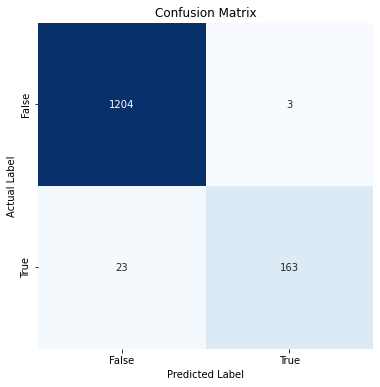

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Classification Metrics

# Accuracy
accuracy = accuracy_score(Y_test, pred_LR)
print("Accuracy:", accuracy)

# Detailed Classification Report
print("Classification Report:\n", classification_report(Y_test, pred_LR))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, pred_LR)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

## Model with TFIDF

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_Tfidf = TfidfVectorizer().fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X_Tfidf,Y)

model = LogisticRegression()
model.fit(X_train, Y_train)
pred_LR_TFIDF = model.predict(X_test)

In [72]:
cm=confusion_matrix(Y_test, pred_LR_TFIDF)
print(cm)
acc=(cm[0,0]+cm[1,1])/sum(sum(cm))
print('Accuracy with TFIDF is ',acc)

[[1177    1]
 [  63  152]]
Accuracy with TFIDF is  0.9540559942569993


Accuracy: 0.9540559942569993
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1178
        spam       0.99      0.71      0.83       215

    accuracy                           0.95      1393
   macro avg       0.97      0.85      0.90      1393
weighted avg       0.96      0.95      0.95      1393

Confusion Matrix:
 [[1177    1]
 [  63  152]]


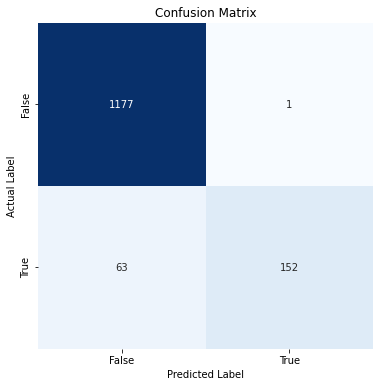

In [73]:
# 1. Classification Metrics

# Accuracy
accuracy = accuracy_score(Y_test, pred_LR_TFIDF)
print("Accuracy:", accuracy)

# Detailed Classification Report
print("Classification Report:\n", classification_report(Y_test, pred_LR_TFIDF))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, pred_LR_TFIDF)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Model  2: BERT

In [74]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

X_bert = model.encode(X)

C:\Users\abhis\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_bert, Y)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, Y_train)
pred_LR_BERT = model.predict(X_test)
cm=confusion_matrix(Y_test, pred_LR_BERT)
print(cm)
acc=(cm[0,0]+cm[1,1])/sum(sum(cm))
print('Accuracy using Bert is ', acc)

[[1200    3]
 [  10  180]]
Accuracy using Bert is  0.990667623833453


Accuracy: 0.782483847810481
Classification Report:
               precision    recall  f1-score   support

         ham       0.86      0.89      0.88      1203
        spam       0.13      0.11      0.12       190

    accuracy                           0.78      1393
   macro avg       0.50      0.50      0.50      1393
weighted avg       0.76      0.78      0.77      1393

Confusion Matrix:
 [[1070  133]
 [ 170   20]]


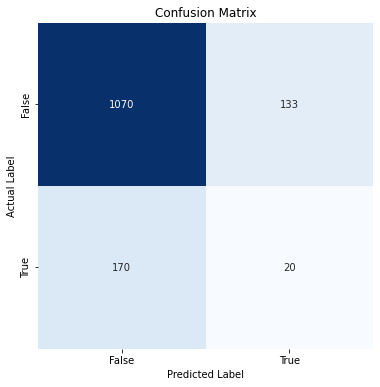

In [77]:
# 1. Classification Metrics

# Accuracy
accuracy = accuracy_score(Y_test, pred_LR_TFIDF)
print("Accuracy:", accuracy)

# Detailed Classification Report
print("Classification Report:\n", classification_report(Y_test, pred_LR_TFIDF))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, pred_LR_TFIDF)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()